### Load Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('ticks')
sns.set_palette('muted')

### Load the Data

In [3]:
train = pd.read_csv('../../train.csv')
test = pd.read_csv('../../test.csv')

### Check the Data

In [4]:
print('train.shape: {}'.format(train.shape))
print('test.shape: {}'.format(test.shape))

train.shape: (200000, 202)
test.shape: (200000, 201)


In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Training set and testing set both got 200000 entries and 200 anonimyzed attributes, the training set got an extra "target" column, of course.

In [7]:
train.dtypes.value_counts()

float64    200
object       1
int64        1
dtype: int64

All the attributes seems to be numerical.

### Check for missing data

In [8]:
print('Missing data in training set: {}'.format(train.isnull().sum().sum()))
print('Missing data in testing set: {}'.format(test.isnull().sum().sum()))

Missing data in training set: 0
Missing data in testing set: 0


There are no missing data in both the training and testing sets.

### Check the distribution of the target

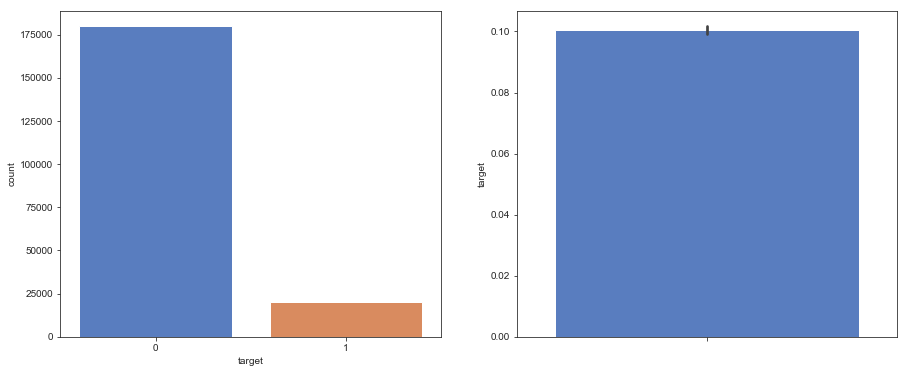

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='target')
plt.subplot(1, 2, 2)
sns.barplot(data=train, y='target')
plt.show()

In [10]:
print('About {:.2f}% of the entries got target value 1'.format(100 * train.target.mean()))

About 10.05% of the entries got target value 1


### Plot the features

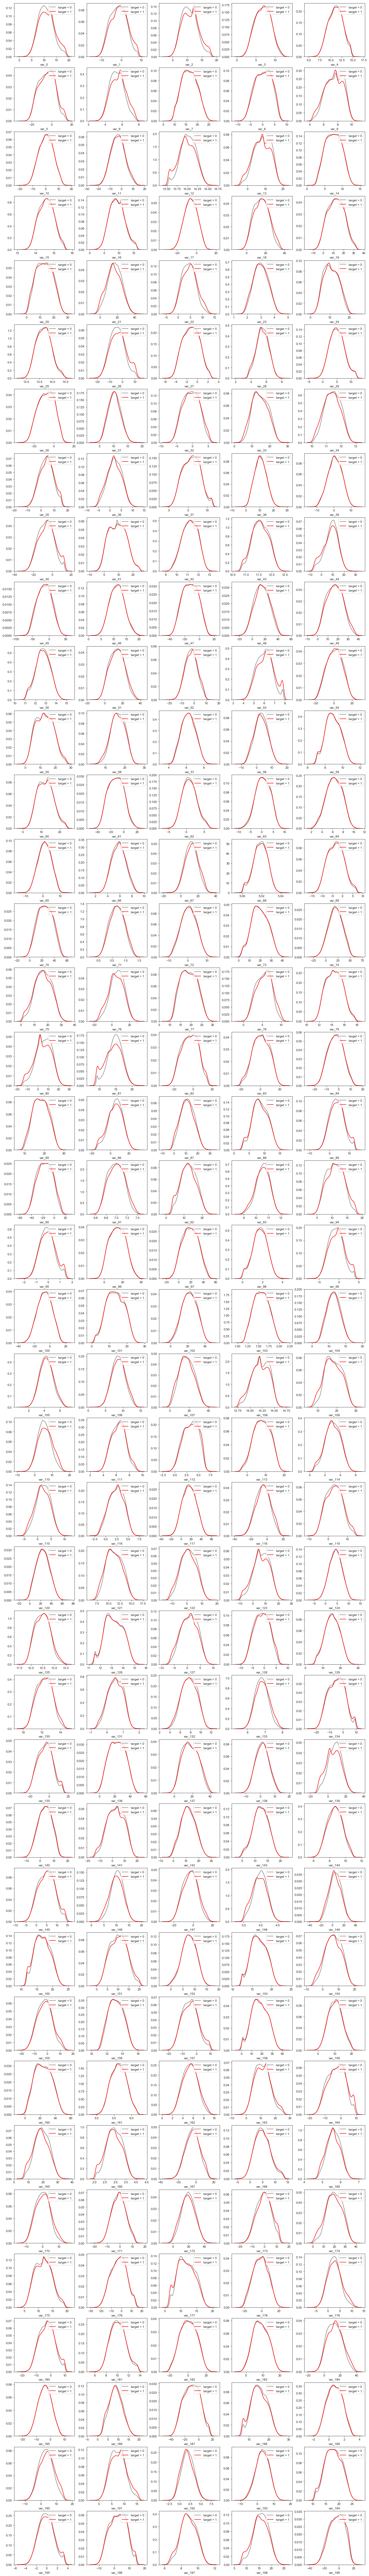

In [16]:
plt.figure(figsize=(20, 150))
for i in range(200):
    plt.subplot(40, 5, i+1)
    feat = 'var_' + str(i)
    sns.distplot(train[train.target==0][feat], hist=False, color='gray', label='target = 0')
    sns.distplot(train[train.target==1][feat], hist=False, color='red', label='target = 1')
    plt.legend(loc='upper right')
plt.show()

There are attributes which seems to be differently distributed in positive and negative groups, such as var_0, var_1, var_2, var_12, var_53, var_198... There are also some attributes which got almost same distribution in both groups, such as var_187, var_185... Some feature selection is needed.

### Check the correlation between features

In [18]:
df = train[train.columns[2:]]
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [49]:
corr = df.corr()
correlations = pd.DataFrame(columns=['feature_1', 'feature_2', 'correlation'])

for i in range(200):
    if i > 0:
        for j in range(i):
            row = [df.columns[i], df.columns[j], corr.iloc[i, j]]
            row = pd.Series(row, index=correlations.columns)
            correlations = correlations.append(row, ignore_index=True)

correlations.head()

,feature_1,feature_2,correlation
0,var_1,var_0,-0.000544
1,var_2,var_0,0.006573
2,var_2,var_1,0.003980
3,var_3,var_0,0.003801
4,var_3,var_1,0.000010


In [50]:
correlations['abs(correlation)'] = np.abs(correlations.correlation)
correlations.head()

,feature_1,feature_2,correlation,abs(correlation)
0,var_1,var_0,-0.000544,0.000544
1,var_2,var_0,0.006573,0.006573
2,var_2,var_1,0.003980,0.003980
3,var_3,var_0,0.003801,0.003801
4,var_3,var_1,0.000010,0.000010


In [51]:
correlations['abs(correlation)'].describe()

count    1.990000e+04
mean     1.986439e-03
std      1.506103e-03
min      2.703975e-08
25%      7.903091e-04
50%      1.679507e-03
75%      2.874466e-03
max      9.844361e-03
Name: abs(correlation), dtype: float64

The highest correlation between features are less than 0.01, the features are barely correlated.